Libraries used

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

import functions_new_jit as func
import importlib
importlib.reload(func)

import numba

Histogram of a threshold distribution according to a normal distribution

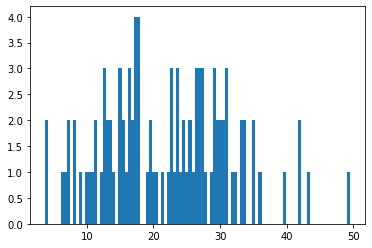

In [26]:
N = 100            # number of Agents
average = 20       # average value of the normal distribution
deviation = 10     # standard deviation of the normal distribution

thresholds = np.array([])
thresholds = func.create_thresholds(N,average,deviation)

# plot
plt.figure()
plt.hist(thresholds,100)
plt.show()

Riot evolution plot

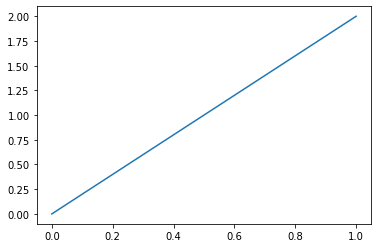

In [27]:
N = 100            # number of Agents
average = 25       # average value of the normal distribution
deviation = 12     # standard deviation of the normal distribution

thresholds = func.create_thresholds(N,average,deviation)
riot = func.simulate_riot(thresholds)

plt.figure()
plt.plot(riot)
plt.show()

Average size of a riot according to the deviation value of the normal distribution of thresholds

100.00%


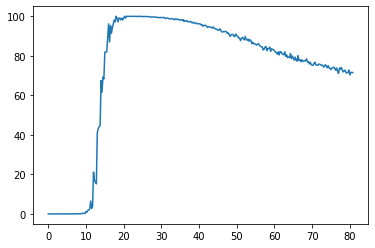

In [28]:
N = 100            # number of Agents
a = True           # negative thresholds are converted to 0
average = 25       # average value of the normal distribution

deviations = np.arange(0,81,0.25) # standard deviations of the normal distribution
simulations = 100                 # number of simulations per standard deviation value
averages = np.array([])

thresholds = np.array([])

for i in deviations:         # a set of simulations per standard deviation value
    average_size = 0
    clear_output(wait=True)
    print(str("%.2f" % ((i/80.75)*100)+"%"), end="\n")
    
    for j in range(simulations):   # riot simulation
        thresholds = func.create_thresholds(N,average,int(i))
        riot = func.simulate_riot(thresholds)
        average_size += riot[-1]
    
    average_size = average_size/simulations
    averages = np.append(averages, average_size)

plt.figure()
plt.plot(deviations,averages)
plt.show()

Average size of a riot according to the deviation value of the normal distribution of thresholds

98.77%


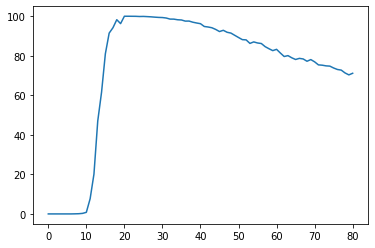

In [29]:
N = 100            # number of Agents
a = True           # negative thresholds are converted to 0
average = 25       # average value of the normal distribution

deviations = np.arange(0,81) # standard deviations of the normal distribution
simulations = 100                 # number of simulations per standard deviation value
averages = np.array([])

thresholds = np.array([])

for i in deviations:         # a set of simulations per standard deviation value
    average_size = 0
    clear_output(wait=True)
    print(str("%.2f" % ((i/81)*100)+"%"), end="\n")
    
    for j in range(simulations):   # riot simulation
        thresholds = func.create_thresholds(N,average,int(i))
        riot = func.simulate_riot(thresholds)
        average_size += riot[-1]
    
    average_size = average_size/simulations
    averages = np.append(averages, average_size)

plt.figure()
plt.plot(deviations,averages)
plt.show()

Heat map of the function: "simulate_riot", given that the x axis corresponds to the threshold distribution average value and the y axis corresponds to it's standard deviation value

In [33]:
# tornar o processo de " graficação" mais rápido com o @njit
@numba.njit
def graficar_simulate_riot(average_samples, deviations, simulations):
    
    heat_map = np.zeros((len(average_samples),len(deviations)))
    
    for k in averages_sample:

        for i in deviations:         # a set of simulations per standard deviation value
            average_size = 0

            for j in range(simulations):   # riot simulation
                thresholds = func.create_thresholds(N,int(k),int(i))
                riot = func.simulate_riot(thresholds)
                size = riot[-1]
                average_size += size

            average_size = average_size/simulations
            heat_map[i][k] = average_size

    return heat_map

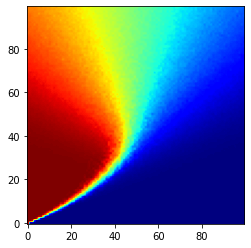

In [34]:
N = 100            # number of Agents

average_max = 100
deviation_max = 100
averages_sample = np.arange(0,average_max)  # average value of the normal distribution
deviations = np.arange(0,deviation_max)       # standard deviations of the normal distribution
simulations = 100                  # number of simulations per standard deviation value

heat_map = graficar_simulate_riot(averages_sample, deviations, simulations)

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()